# **IDEA 1**
Liquidity and volatility are often inversely related. We can model volatility as a function of liquidity:
$$
\sigma(t) = \sigma_0 \cdot f(L_t)
$$
Where $ L_t $ is a proxy for liquidity, e.g. DEX pool depth or 24h volume. For example:
$$
f(L_t) = \frac{1}{\sqrt{L_t}} \quad \text{or} \quad f(L_t) = e^{-\alpha L_t}
$$

Where: 
- $\alpha \gt 0$ representing how sharply liquidity decays.
- $L_t$ is the measure of liquidity at time t.

The SDE becomes:
$$
dS_t = \mu S_t\, dt + \sigma(L_t) S_t\, dW_t
$$


# **IDEA 2**

We can also add a mean-reversion pressure due to liquidity drying up:
$$
dS_t = (\mu - \gamma \cdot \phi(L_t)) S_t\, dt + \sigma S_t\, dW_t
$$
Where $ \gamma $ is a scaling factor and $ \phi(L_t) = \frac{1}{L_t} $ could represent the liquidity-driven pull back.


# **IDEA 3**
Alternatively, we can model liquidity-driven jumps using a jump-diffusion process:
$$
dS_t = \mu S_t\, dt + \sigma S_t\, dW_t + S_t\, dJ_t
$$
Where $ J_t \sim \text{Poisson}(\lambda(L_t)) $, and $ \lambda(L_t) $ represents the jump intensity, which increases as liquidity decreases.


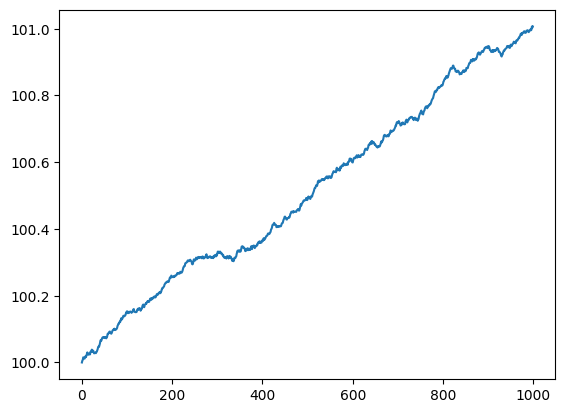

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_price_model(initial_price, drift, volatility, n_steps, time_unit=1):
    dt = time_unit / n_steps
    N = n_steps * time_unit

    S = np.zeros(N)
    S[0] = initial_price

    initial_volatility = volatility
    alpha = 1
    initial_liquidity = 1000
    minimum_volatility = 0.001
    liquidity_growth_per_step = 1 # assume liquidity growth is linear

    liquidity = initial_liquidity
    for i in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        volatility_function = (initial_volatility - minimum_volatility) * np.exp(-alpha * liquidity) + minimum_volatility #sigma function
        S[i] = S[i-1] * np.exp((drift - 0.5 * volatility_function**2) * dt + volatility_function * dW)
        liquidity += liquidity_growth_per_step

    return S

initial_price = 100
drift = 0.01
volatility = 0.1
n_steps = 1000
time_unit = 1

prices = simulate_price_model(initial_price, drift, volatility, n_steps, time_unit)

plt.plot(prices)
plt.show()